Data Science Project: Red Wine Reviews

In [451]:
import pandas as pd 

In [452]:
#had to search error not reading file
#https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python

In [453]:
df = pd.read_csv('data/redwinereview.csv', encoding = "ISO-8859-1", engine='python')

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


In [455]:
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [456]:
#test count of records per year
df['Year'].value_counts().head(5)

2016    1776
2017    1558
2015    1396
2018    1099
2014     798
Name: Year, dtype: int64

In [457]:
import math

In [458]:
#use to round up to no decimals
def round_up(n, decimals=0): 
    multiplier = 10 ** decimals 
    return math.ceil(n * multiplier) / multiplier

In [459]:
df['RatingGroup'] =  df['Rating'].apply(round_up)
df['PriceGroup'] =  df['Price'].apply(round_up)
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0


In [460]:
df['WineName'] = df['Name'].str[:-5]
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0,Pomerol
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0,Bardolino
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir


In [516]:
#https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
#use concatenate for winery wine name key
#new = df['WineName'].copy()
#df['WineryWine'] = df['Winery'].str.cat(new, sep ="-") 
#df.head(5)

#was able to concatenate using above but needed apply method, received help from classmate on below
def concatstr (winery, winename):
    return str(winery) + '-' + str(winename) 

df['WineryWine'] = df[['Winery','WineName']].apply(lambda row: concatstr(row['Winery'], row['WineName']), axis=1)
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine,PriceGroup2,WineType
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0,Pomerol,Château La Providence-Pomerol,100.0,NaN
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac,Château Mont-Redon-Lirac,20.0,NaN
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana,Renzo Masi-Erta e China Rosso di Toscana,10.0,NaN
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0,Bardolino,Cavalchina-Bardolino,10.0,NaN
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir,Markowitsch-Ried Scheibner Pinot Noir,30.0,NaN


In [463]:
df['PriceGroup2'] = df['Price'].round(-1)
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine,PriceGroup2
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0,Pomerol,Château La Providence-Pomerol,100.0
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac,Château Mont-Redon-Lirac,20.0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana,Renzo Masi-Erta e China Rosso di Toscana,10.0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0,Bardolino,Cavalchina-Bardolino,10.0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir,Markowitsch-Ried Scheibner Pinot Noir,30.0


In [464]:
#https://stackoverflow.com/questions/59270560/pandas-looping-through-a-list-of-strings-in-a-column-create-a-new-column-with
winetypes = ['merlot','cabernet','rioja']
df['WineType'] = df['WineName'].str.lower().str.extract(f'({"|".join(winetypes)})')
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine,PriceGroup2,WineType
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0,Pomerol,Château La Providence-Pomerol,100.0,NaN
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac,Château Mont-Redon-Lirac,20.0,NaN
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana,Renzo Masi-Erta e China Rosso di Toscana,10.0,NaN
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0,Bardolino,Cavalchina-Bardolino,10.0,NaN
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir,Markowitsch-Ried Scheibner Pinot Noir,30.0,NaN


In [465]:
#maskyear = df.query("Year in ('2015', '2016', '2017', '2018')").head(25)
maskyear = df.query("Year in ('2015', '2016', '2017', '2018')")
len(maskyear)

5829

In [466]:
#create a new data set for the years 2015, 2016, 2017, and 2018 for comparable number of ratings.
##https://pandas.pydata.org/docs
df2 = df[df["Year"].isin(['2015', '2016', '2017', '2018'])]

In [467]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829 entries, 1 to 8665
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5829 non-null   object 
 1   Country          5829 non-null   object 
 2   Region           5829 non-null   object 
 3   Winery           5829 non-null   object 
 4   Rating           5829 non-null   float64
 5   NumberOfRatings  5829 non-null   int64  
 6   Price            5829 non-null   float64
 7   Year             5829 non-null   object 
 8   RatingGroup      5829 non-null   float64
 9   PriceGroup       5829 non-null   float64
 10  WineName         5829 non-null   object 
 11  WineryWine       5829 non-null   object 
 12  PriceGroup2      5829 non-null   float64
 13  WineType         786 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 683.1+ KB


In [468]:
df2['Price'].mean()

25.577006347572173

In [469]:
df2[['Price', 'Rating','NumberOfRatings']].describe()

,Price,Rating,NumberOfRatings
count,5829.000000,5829.000000,5829.000000
mean,25.577006,3.840470,400.567336
std,41.478306,0.291866,869.514386
min,3.550000,2.500000,25.000000
25%,9.500000,3.600000,63.000000
50%,14.790000,3.800000,148.000000
75%,26.220000,4.000000,374.000000
max,960.170000,4.800000,19489.000000


In [ ]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

In [470]:
df2[['Year','Price', 'Rating','NumberOfRatings']].groupby('Year').mean()

,Price,Rating,NumberOfRatings
Year,,,
2015,35.867722,3.929513,426.881089
2016,31.324679,3.888851,413.796171
2017,20.604955,3.809820,393.004493
2018,10.265587,3.692630,356.485896


In [471]:
df2[['Year','Price', 'Rating','NumberOfRatings']].groupby('Year').min()

,Price,Rating,NumberOfRatings
Year,,,
2015,4.16,2.6,25
2016,3.95,2.5,25
2017,4.30,2.8,25
2018,3.55,2.5,25


In [472]:
df2[['Year','Price', 'Rating','NumberOfRatings']].groupby('Year').max()

,Price,Rating,NumberOfRatings
Year,,,
2015,730.12,4.8,14148
2016,960.17,4.8,12079
2017,633.62,4.7,19489
2018,87.90,4.4,11920


In [473]:
df2[['Year','Rating']].groupby('Year').count()

,Rating
Year,
2015,1396
2016,1776
2017,1558
2018,1099


In [474]:
df2.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine,PriceGroup2,WineType
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac,Château Mont-Redon-Lirac,20.0,NaN
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana,Renzo Masi-Erta e China Rosso di Toscana,10.0,NaN
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir,Markowitsch-Ried Scheibner Pinot Noir,30.0,NaN
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017,4.0,20.0,Gigondas (Nobles Terrasses),Vieux Clocher-Gigondas (Nobles Terrasses),20.0,NaN
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,43.87,2016,4.0,44.0,Marion's Vineyard Pinot Noir,Schubert-Marion's Vineyard Pinot Noir,40.0,NaN


In [475]:
#https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe/55335207#55335207
df2[df2['WineName'].str.lower().str.contains(r'cabernet|merlot|rioja')]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine,PriceGroup2,WineType
18,Cabernet Sauvignon 2015,United States,California,Hacienda,3.8,100,7.95,2015,4.0,8.0,Cabernet Sauvignon,Hacienda-Cabernet Sauvignon,10.0,cabernet
40,Cabernet Sauvignon 2015,South Africa,Stellenbosch,Big Flower,4.0,101,16.50,2015,4.0,17.0,Cabernet Sauvignon,Big Flower-Cabernet Sauvignon,20.0,cabernet
45,Cabernet Sauvignon 2018,Chile,Central Valley,Valdivieso,3.3,101,7.60,2018,4.0,8.0,Cabernet Sauvignon,Valdivieso-Cabernet Sauvignon,10.0,cabernet
49,Stony Terrace Cabernet Sauvignon 2016,United States,Napa Valley,Rutherford Wine Company,3.8,101,18.03,2016,4.0,19.0,Stony Terrace Cabernet Sauvignon,Rutherford Wine Company-Stony Terrace Cabernet...,20.0,cabernet
54,Merlot 2018,France,Pays d'Oc,Les Jamelles,3.6,101,5.36,2018,4.0,6.0,Merlot,Les Jamelles-Merlot,10.0,merlot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,Essence du Cap Cabernet Sauvignon 2016,South Africa,Western Cape,Fleur du Cap,3.3,99,9.90,2016,4.0,10.0,Essence du Cap Cabernet Sauvignon,Fleur du Cap-Essence du Cap Cabernet Sauvignon,10.0,cabernet
8644,Private Bin Merlot - Cabernet Sauvignon 2016,New Zealand,Hawke's Bay,Villa Maria,3.4,99,12.60,2016,4.0,13.0,Private Bin Merlot - Cabernet Sauvignon,Villa Maria-Private Bin Merlot - Cabernet Sauv...,10.0,merlot
8656,Legato Merlot - Cabernet Sauvignon 2017,South Africa,Stellenbosch,Anura,3.8,99,11.60,2017,4.0,12.0,Legato Merlot - Cabernet Sauvignon,Anura-Legato Merlot - Cabernet Sauvignon,10.0,merlot
8657,Cerrado del Castillo Rioja 2015,Spain,Rioja,Castillo de Cuzcurrita,4.3,99,53.61,2015,5.0,54.0,Cerrado del Castillo Rioja,Castillo de Cuzcurrita-Cerrado del Castillo Rioja,50.0,rioja


In [476]:
import matplotlib.pyplot as plt

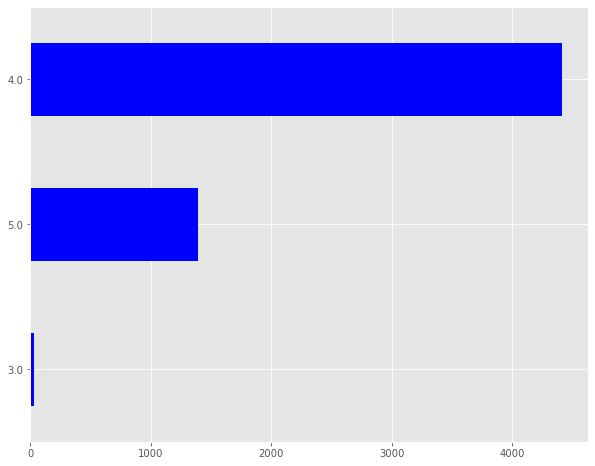

In [477]:
df2['RatingGroup'].value_counts(ascending=True).plot(kind='barh', color="blue")
plt.show()

In [478]:
df2['RatingGroup'].value_counts()

4.0    4408
5.0    1390
3.0      31
Name: RatingGroup, dtype: int64

In [479]:
#source: referenced GA class/lab solutions
from matplotlib import rcParams
import seaborn as sns
# Increase default figure and font sizes for easier viewing.
#plt.rcParams['figure.figsize'] = (5, 3)
plt.rc('figure', figsize=(10,8))
#plt.rcParams['font.size'] = 25

plt.style.use('ggplot')

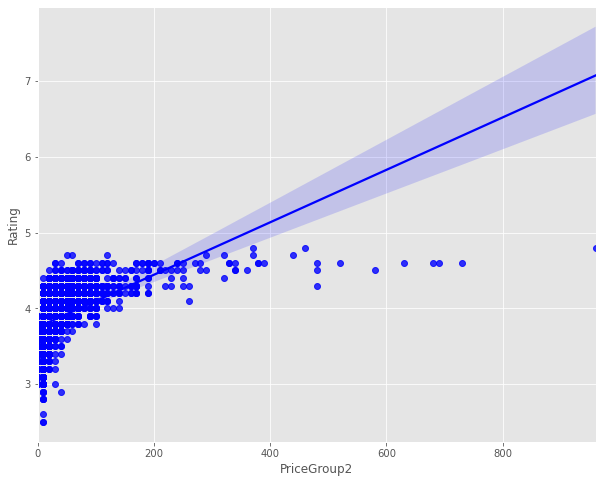

In [480]:
sns.regplot(x='PriceGroup2', y='Rating', color="blue", data=df2)
plt.show()

In [481]:
df2['PriceGroup'].value_counts().head(10)

9.0     395
8.0     382
10.0    379
7.0     329
11.0    274
13.0    261
14.0    258
12.0    242
15.0    227
16.0    223
Name: PriceGroup, dtype: int64

In [482]:
#source: referenced GA class/lab solutions
#under50 = df2['Price'] < 51
under50 = df2['Price'].between(5, 51)

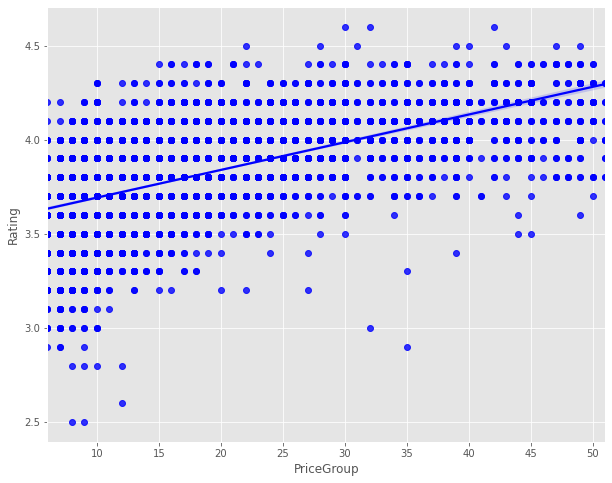

In [483]:
sns.regplot(x='PriceGroup', y='Rating', color="blue", data=df2[under50])
plt.show()

In [484]:
winetype = df2['WineName'].str.lower().str.contains(r'cabernet|merlot|rioja')
rate30 = df2['NumberOfRatings'] > 29

In [485]:
#create new data set for wines under $50, for types=cabernet, merlot, and rioja, and had at least 30 ratings.
df3 = df2[under50 & winetype & rate30]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 18 to 8665
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             707 non-null    object 
 1   Country          707 non-null    object 
 2   Region           707 non-null    object 
 3   Winery           707 non-null    object 
 4   Rating           707 non-null    float64
 5   NumberOfRatings  707 non-null    int64  
 6   Price            707 non-null    float64
 7   Year             707 non-null    object 
 8   RatingGroup      707 non-null    float64
 9   PriceGroup       707 non-null    float64
 10  WineName         707 non-null    object 
 11  WineryWine       707 non-null    object 
 12  PriceGroup2      707 non-null    float64
 13  WineType         707 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 82.9+ KB


In [486]:
df3[['Year','Rating']].groupby('Year').count()

,Rating
Year,
2015,144
2016,203
2017,201
2018,159


In [487]:
#What are the top 5 rated wines with at least 30 ratings?   ???how to show YoY 
#df3[['Name', 'Price', 'Rating','NumberOfRatings']].groupby('Name').mean().sort_values('Rating', ascending=False).head(10)
df3[['WineryWine', 'PriceGroup', 'Rating','NumberOfRatings']].groupby('WineryWine').mean().sort_values('Rating', ascending=False).head(10)
#df3[['WineryWine', 'PriceGroup', 'RatingGroup','NumberOfRatings']].groupby(['WineryWine', 'Year']).mean().sort_values('RatingGroup', ascending=False).head(10)

,PriceGroup,Rating,NumberOfRatings
WineryWine,,,
Bodegas Roda-Roda I Reserva Rioja,47.0,4.4,138.0
Roveglia-Cà d'Oro Garda Cabernet Sauvignon,19.0,4.4,44.0
Lan-A Mano Rioja,34.0,4.3,466.0
El Enemigo-Cabernet Franc,22.0,4.3,2604.0
The Prisoner-Thorn Merlot,49.0,4.3,363.0
Kanonkop-Cabernet Sauvignon,31.0,4.3,339.0
Hensel-Höhenflug Merlot,17.0,4.3,82.0
Brutalis-Alicante Bouschet - Cabernet Sauvignon,28.0,4.2,429.0
Black Stallion-Cabernet Sauvignon,32.0,4.2,5217.0


In [488]:
#https://jamesrledoux.com/code/group-by-aggregate-pandas
#wineryyear = df3.groupby(['Winery', 'Year']).agg({'Rating': ['mean', 'min', 'max']})
wineryyear = df3.groupby(['Winery', 'Year']).agg({'Rating': 'mean', 'Price': 'mean'})
#wineryyear.columns = ['wineyear_mean', 'wineyear_min', 'wineyear_max']
wineryyear.head(10)

Rating   Price
Winery               Year                
14 Hands             2015    3.60  11.600
                     2016    3.80  13.500
19 Crimes            2018    3.70   9.490
689 - Six Eight Nine 2017    3.90  15.400
Abadal               2016    3.90  12.900
Alamos               2016    3.60   8.890
Allesverloren        2015    3.70  14.900
                     2017    3.80  12.280
Alois Lageder        2015    3.70  17.790
                     2016    3.65  16.045

In [489]:
#create new data set where wines had 3-4 years worth to compare
#https://stackoverflow.com/questions/29836836/how-do-i-filter-a-pandas-dataframe-based-on-value-counts
df4 = df3[df3['WineryWine'].map(df3['WineryWine'].value_counts()) > 2]


In [490]:
#wineyear = df4.groupby(['WineryWine', 'Year']).agg({'Rating': 'mean', 'Price': 'mean'})
wineyear = df4.groupby(['WineryWine', 'Year']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values(['WineryWine','Year'], ascending=False)
wineyear.head(20)

Rating  Price
WineryWine                                        Year               
Santa Rita-120 Cabernet Sauvignon                 2018    3.50   6.33
                                                  2017    3.40   7.80
                                                  2015    3.20   6.77
Rust En Vrede-Estate Vineyards Cabernet Sauvignon 2018    4.00  21.99
                                                  2017    4.10  22.50
                                                  2016    4.00  28.09
Ramón Bilbao-Crianza Rioja                        2017    3.90   8.70
                                                  2016    3.90   8.60
                                                  2015    3.80   8.95
Puklavec Family Wines-Cabernet Sauvignon - Merlot 2017    3.30   8.95
                                                  2016    3.40   7.66
                                                  2015    3.00   7.65
Montes Alpha-Merlot                               2017    3.90  13.50
                                                  2016    4.00  13.49
                                                  2015    3.80  16.09
MAN-Cabernet Sauvignon (Ou Kalant)                2018    3.40   5.94
                                                  2017    3.50   5.95
                                                  2016    3.50   7.19
Louis M. Martini-Cabernet Sauvignon               2016    3.95  24.11
                                                  2015    3.80  17.75

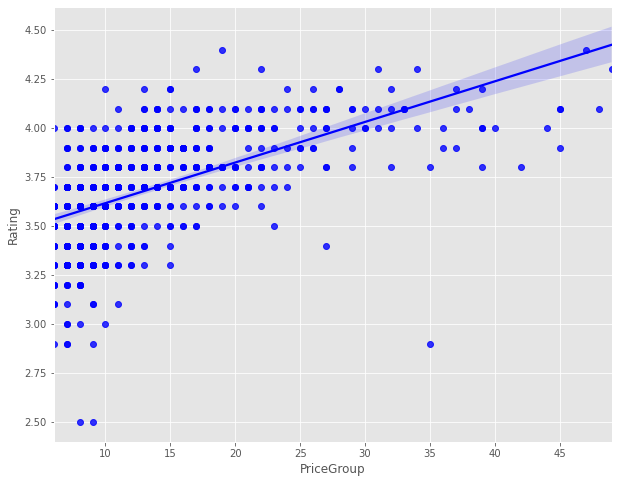

In [491]:
sns.regplot(x='PriceGroup', y='Rating', color="blue", data=df3)
plt.show()

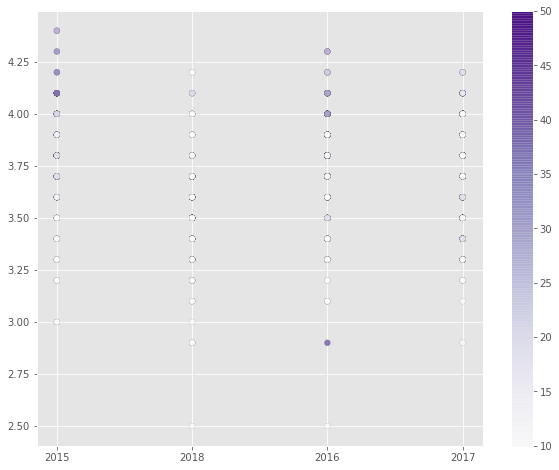

In [492]:
#source from GA class work
# s=size of dot????
# c=colors
# cmap=color map
#plt.scatter(x = 'Rating',y = "PriceGroup", c="Blue", data=df3)
plt.scatter(x = 'Year',y = 'Rating', c='PriceGroup2', cmap='Purples', alpha=0.75, edgecolor='black', linewidth=0.1, data=df3)
#for distribution of color
cbar = plt.colorbar()
#cbar.set_label('This is label')
plt.show()

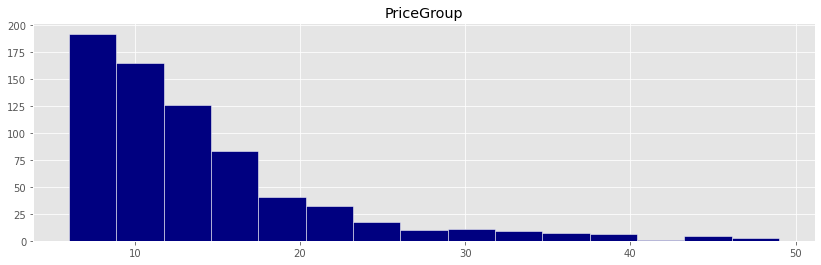

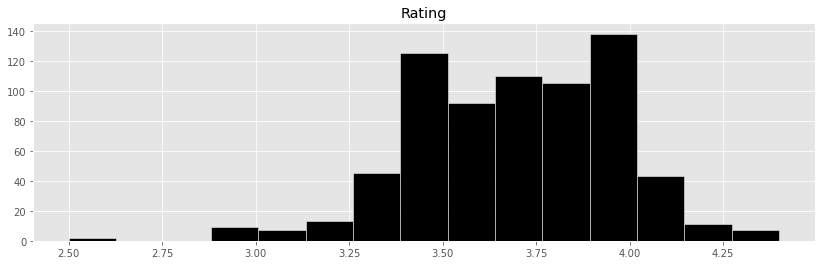

In [493]:
df3.hist('PriceGroup', figsize=(14,4), bins=15, color="navy", edgecolor='white')
df3.hist('Rating', figsize=(14,4), bins=15, color="black", edgecolor='white')
#df3.hist(figsize=(14,4), bins=15, color="navy")
#plt.xlabel('Price Group')
#plt.ylabel('Volume')
plt.show()

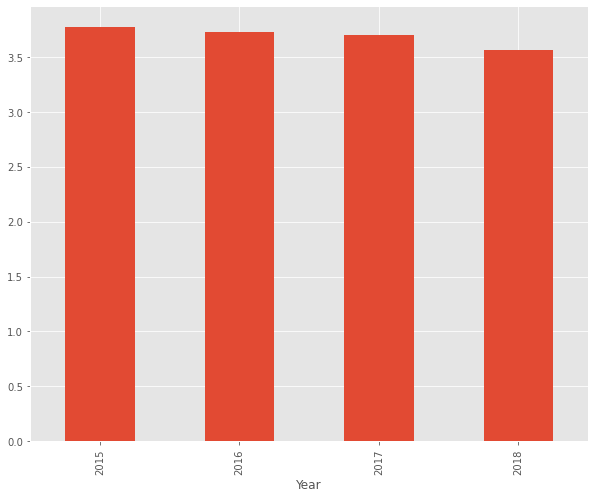

In [494]:
#average rating YoY for df3
df3.groupby(['Year'])['Rating'].mean().plot.bar()
plt.show()

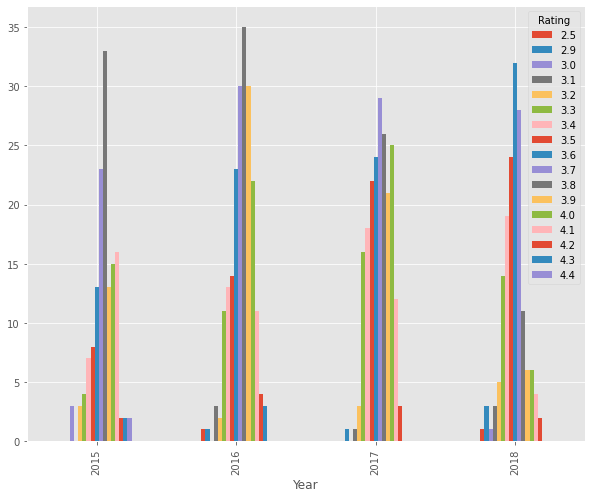

In [495]:
df3.groupby(['Year'])['Rating'].value_counts().unstack().plot.bar()
plt.show()

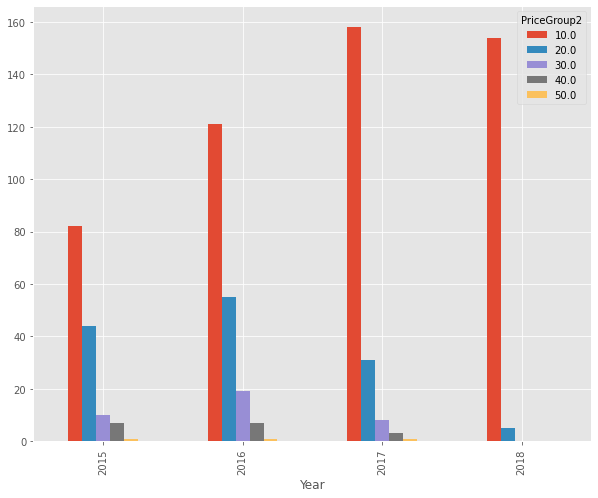

In [496]:
df3.groupby(['Year'])['PriceGroup2'].value_counts().unstack().plot.bar()
plt.show()

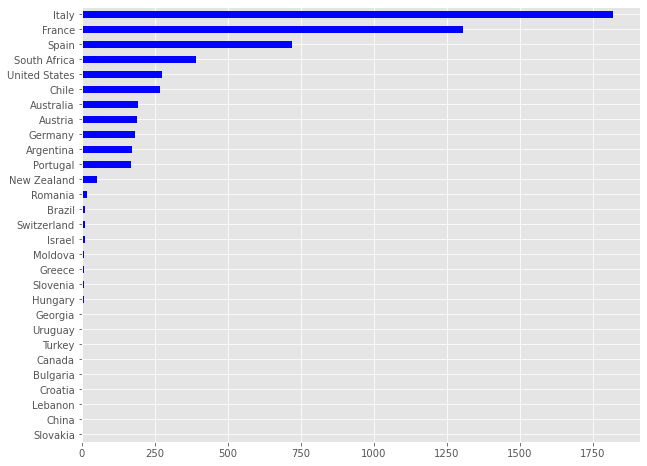

In [497]:
df2['Country'].value_counts(ascending=True).plot(kind='barh', color="blue")
plt.show()

In [514]:
df2[['Country', 'Price', 'Rating','NumberOfRatings']].groupby('Country').mean().sort_values('Rating', ascending=False).head(10)

,Price,Rating,NumberOfRatings
Country,,,
Moldova,28.855000,4.162500,693.625000
Georgia,21.526000,4.140000,124.400000
Croatia,21.400000,4.100000,95.000000
Greece,20.721429,3.985714,266.714286
United States,42.106934,3.914599,1050.645985
Italy,22.685387,3.870346,389.903899
Portugal,16.364790,3.867066,524.814371
France,37.262874,3.866897,228.837548
Lebanon,15.120000,3.850000,974.500000


In [499]:
countrywine = df2.groupby(['Country', 'WineName']).agg({'Rating': 'mean', 'Price': 'mean'})
countrywine

Rating    Price
Country       WineName                                                    
Argentina     1300 Cabernet Sauvignon                       3.600   8.8450
              1300 Malbec                                   3.700   7.7000
              1300 Merlot                                   3.375   8.7475
              Adrianna Vineyard Fortuna Terrae Malbec       4.550  89.9000
              Alta Colección Cabernet Sauvignon Mendoza     3.900   8.9900
...                                                           ...      ...
United States Zinfandel Sonoma Heritage Vines               3.850  13.3550
Uruguay       Estate Cabernet Franc - Tannat (Varietales)   3.800  14.2900
              Estate Tannat - Merlot (Varietales)           3.500  14.2900
              Reserva Tannat                                4.100  15.9000
              Río de Los Pájaros Reserve Tannat             3.900  13.0900

[3625 rows x 2 columns]

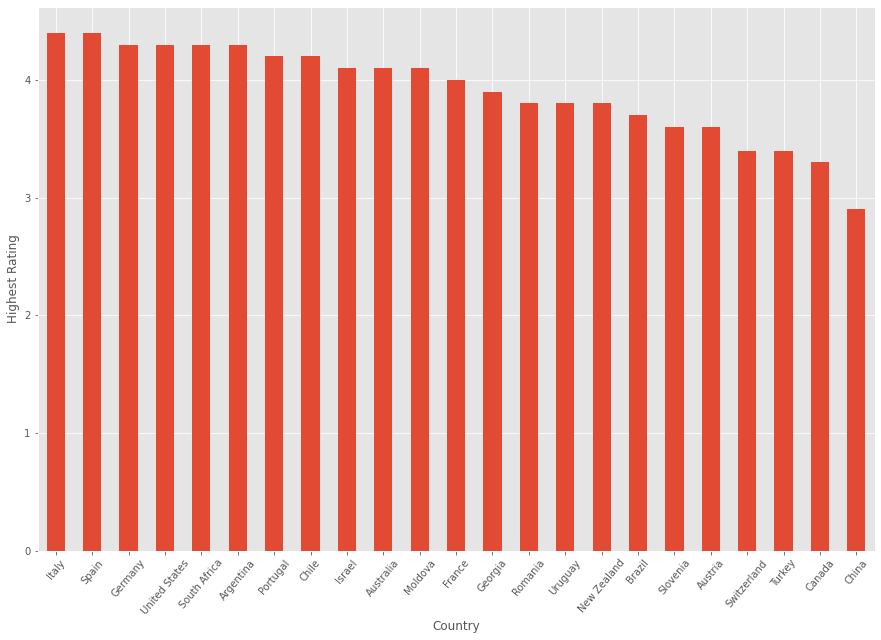

In [500]:
country = df3.groupby('Country')
plt.figure(figsize=(15,10))
country.max().sort_values('Rating',ascending=False)['Rating'].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country")
plt.ylabel("Highest Rating")
plt.show()

In [501]:
cabernet = df3[df3['WineName'].str.lower().str.contains('cabernet')]
merlot = df3[df3['WineName'].str.lower().str.contains('merlot')]
rioja = df3[df3['WineName'].str.lower().str.contains('rioja')]

In [502]:
Top5merlot = merlot.groupby(['WineName']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values('Rating', ascending=False).head(5)
Top5merlot

,Rating,Price
WineName,,
Höhenflug Merlot,4.3,16.45
Thorn Merlot,4.3,48.55
Russiz Superiore Merlot Collio,4.2,23.99
Merlot Riserva Siebeneich,4.1,19.85
Ca' de' Rocchi Dugal Cabernet Sauvignon - Merlot,4.1,13.95


In [503]:
Top5cab = cabernet.groupby(['WineName']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values('Rating', ascending=False).head(5)
Top5cab

,Rating,Price
WineName,,
Cà d'Oro Garda Cabernet Sauvignon,4.4,18.5
Kith & Kin Cabernet Sauvignon,4.2,38.5
Alicante Bouschet - Cabernet Sauvignon,4.2,27.9
Allomi Cabernet Sauvignon,4.2,25.5
Special Cuvée Cabernet Sauvignon,4.1,18.9


In [504]:
Top5rio = rioja.groupby(['WineName']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values('Rating', ascending=False).head(5)
Top5rio

,Rating,Price
WineName,,
Roda I Reserva Rioja,4.4,46.50
A Mano Rioja,4.3,33.90
Finca Torrea Rioja,4.1,28.99
Finca Monasterio Rioja,4.1,21.39
Propiedad Rioja,4.1,26.61


In [434]:
pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org wordcloud

In [505]:
from wordcloud import WordCloud, STOPWORDS

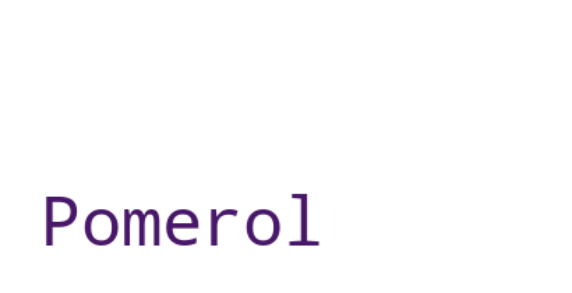

In [506]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
    
text = df.WineName[0]

#wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [507]:
text = " ".join(review for review in df.WineName)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 190593 words in the combination of all review.


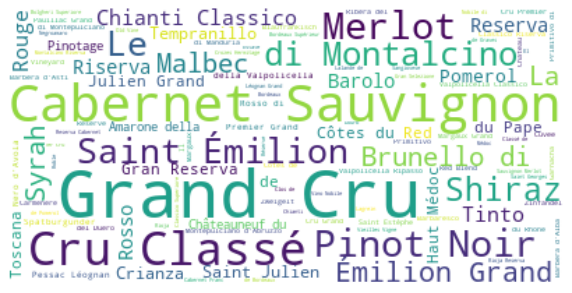

In [508]:
text = " ".join(review for review in df.WineName)
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

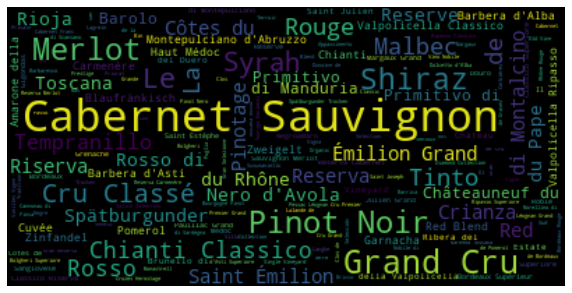

In [509]:
text2 = " ".join(review for review in df2.WineName)
wordcloud = WordCloud(background_color="black").generate(text2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

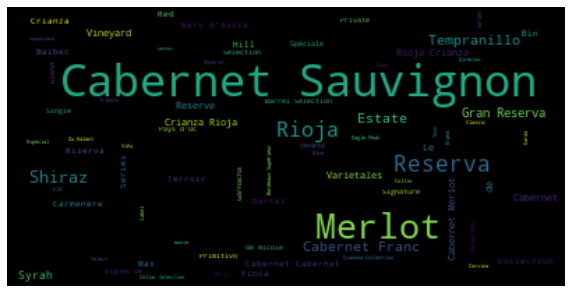

In [510]:
text3 = " ".join(review for review in df3.WineName)
wordcloud = WordCloud(background_color="black", contour_color="white", relative_scaling=.5).generate(text3)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [513]:
df2[['WineType', 'Price', 'Rating','NumberOfRatings']].groupby('WineType').mean().sort_values('Rating', ascending=False)
#df3.groupby(['WineType'])['Rating'].mean().unstack().plot.bar()
#plt.show()

,Price,Rating,NumberOfRatings
WineType,,,
rioja,22.062222,3.844444,1037.617284
cabernet,20.912021,3.732371,662.882474
merlot,11.386318,3.631818,292.731818


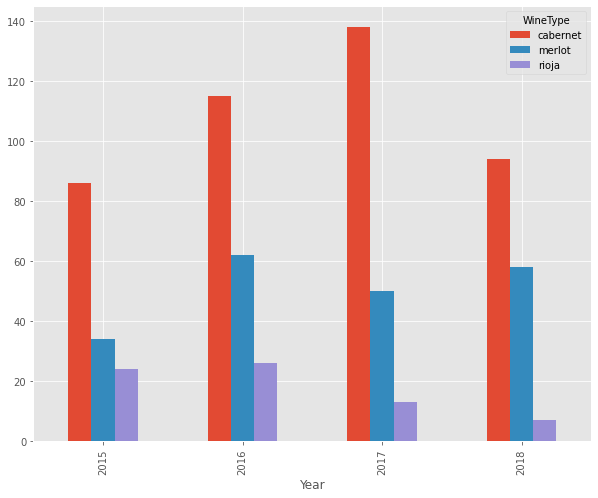

In [517]:
df3.groupby(['Year'])['WineType'].value_counts().unstack().plot.bar()
plt.show()

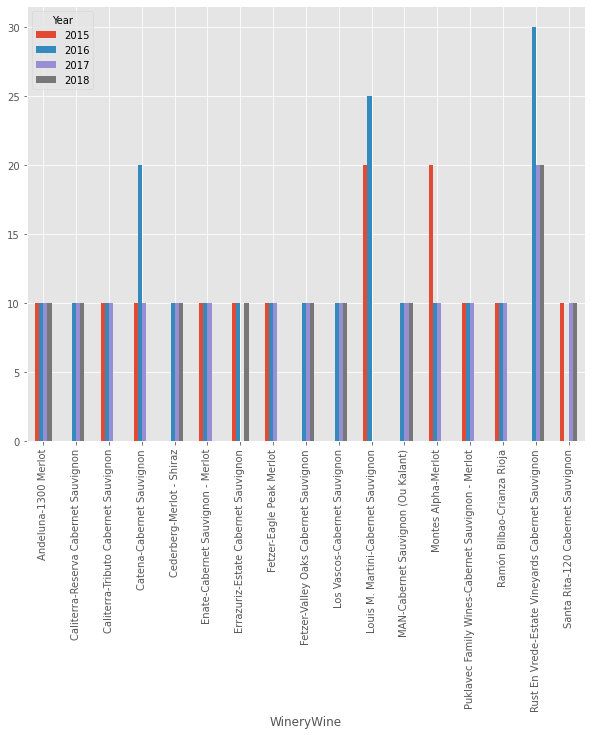

In [522]:
df4.groupby(['WineryWine', 'Year'])['PriceGroup2'].mean().unstack().plot.bar()
plt.show()

AttributeError: 'float' object has no attribute 'plot'

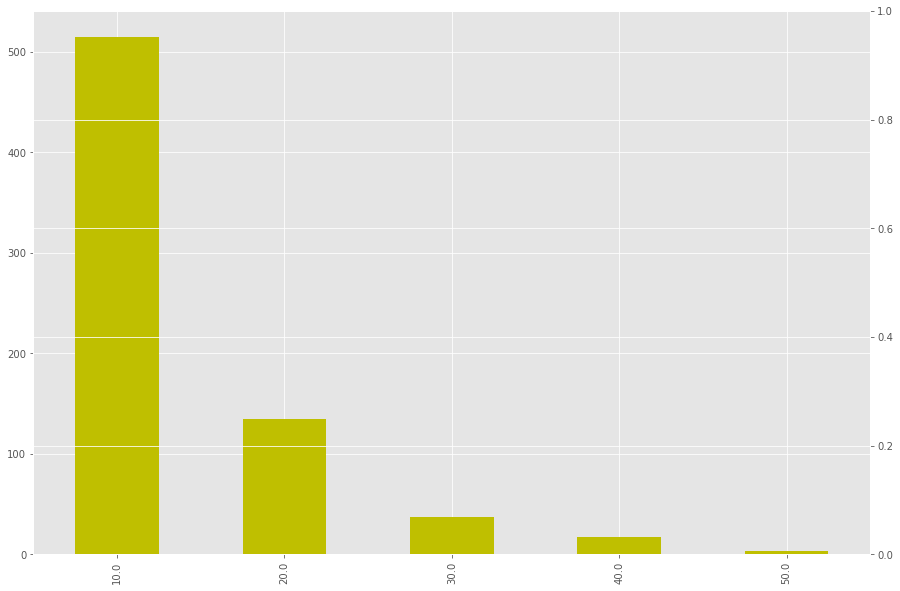

In [521]:
#https://stackoverflow.com/questions/38131697/barplot-line-plot-on-same-plot-but-different-axis-and-line-plot-in-front-of-bar
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
df3['PriceGroup2'].value_counts().plot(kind='bar', color='y', ax=ax1)
df3['Rating'].mean().plot(kind='line', marker='d', ax=ax2)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()